<a href="https://colab.research.google.com/github/Kazusha/Generation_et_Etude_statistique/blob/main/TP_SVM_ULTRA_interactif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Interactif Complet — SVM



## Installation de packages

In [ ]:
!pip install plotly ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.5 MB/s eta 0:00:00


 ## Importation des packages

In [ ]:
import numpy as np
import pandas as pd
from time import time
from google.colab import output
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
import plotly.graph_objects as go
from scipy.stats import loguniform
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, fetch_lfw_people
from ipywidgets import interact, FloatLogSlider, Dropdown
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, roc_curve, auc,ConfusionMatrixDisplay

In [ ]:
output.enable_custom_widget_manager()

Il existe plusieurs classe dans scikit learn pour les supports vecteurs classifier nous nous utiliserons SVC et dans le cas de la regression nous utiliserons SVR.

Vous pouvez voir la docummentation pour avoir plus d'information : https://scikit-learn.org/stable/modules/svm.html

  - Pour toute valeur de random_state utiliser 42

In [ ]:
def plot_decision_boundary(model, X, y, title="Frontière de décision"):
    # On construit la grille pour colorier le plan
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # 2. On crée une grille dense (Meshgrid) en creant 300 points sur chaque axe
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # On prédit la classe pour chaque point de la grille
    # np.c_ aplatit xx et yy et les met côte à côte pour créer des couples (x, y).
    # model.predict donne alors une classe  pour chaque pixel.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # On reformate le résultat
    Z = Z.reshape(xx.shape)

    #  On dessine les zones colorées (le fond)
    # contourf remplit les zones de couleurs selon les valeurs de Z.
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

## Classification Make Moons

Dans ce premier cas de classification , vous aller essayer de trouver un classifier pour separer les points de la demi lune supérieure  et ceux de la demi lune inférieur.

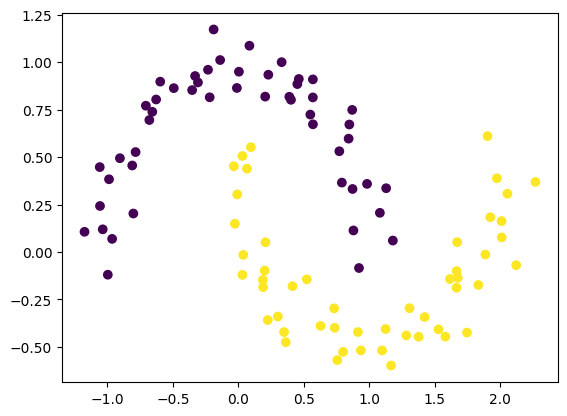

In [ ]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(noise=0.1, random_state=42)
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
plt.show()

In [ ]:
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)

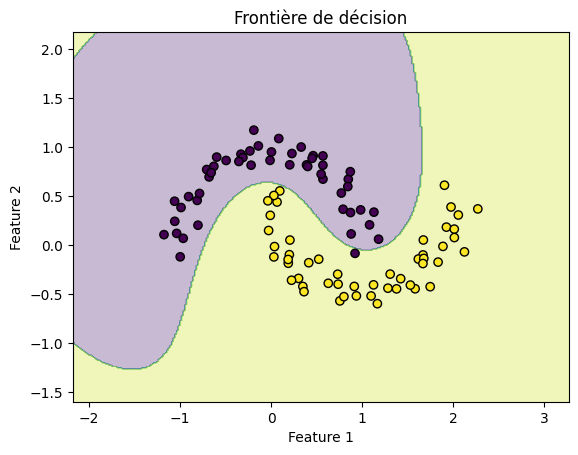

In [ ]:

model_moons = SVC(kernel='rbf', C=1.5)
model_moons.fit(X_train_moons, y_train_moons)
plot_decision_boundary(model_moons, X_moons, y_moons)

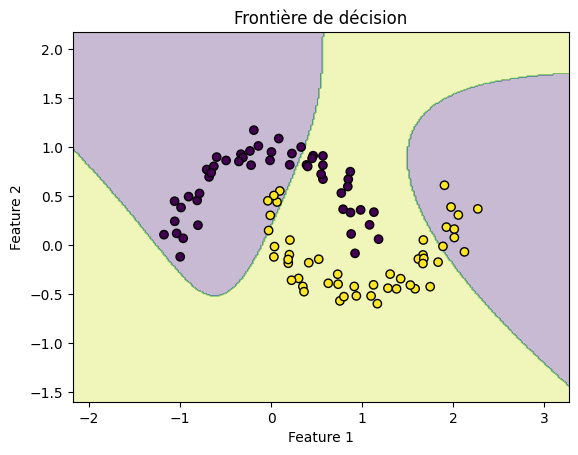

In [ ]:

model_moons = SVC(kernel='sigmoid', C=1.5)
model_moons.fit(X_train_moons, y_train_moons)
plot_decision_boundary(model_moons, X_moons, y_moons)

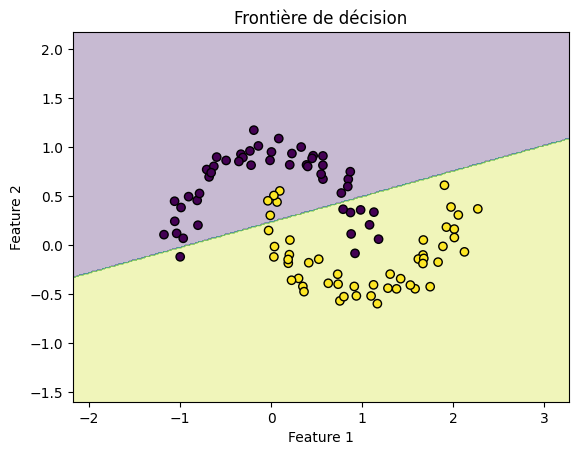

In [ ]:

model_moons = SVC(kernel='linear', C=1.5)
model_moons.fit(X_train_moons, y_train_moons)
plot_decision_boundary(model_moons, X_moons, y_moons)

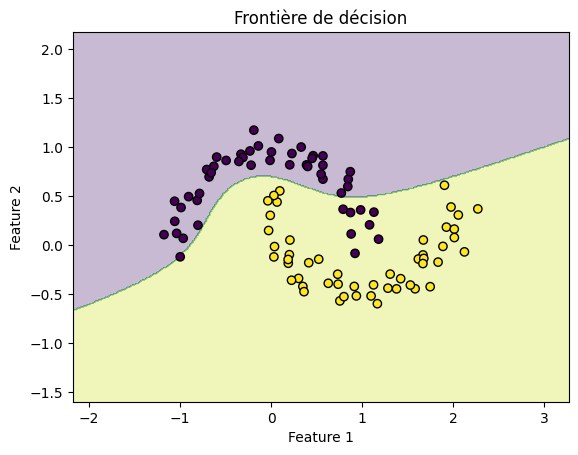

In [ ]:

model_moons = SVC(kernel='poly', C=1.5)
model_moons.fit(X_train_moons, y_train_moons)
plot_decision_boundary(model_moons, X_moons, y_moons)

 - Essayer avec d'autres kernel dans scikit-learn vous avez les options : linear, poly, rbf, sigmoid...

### Évaluation

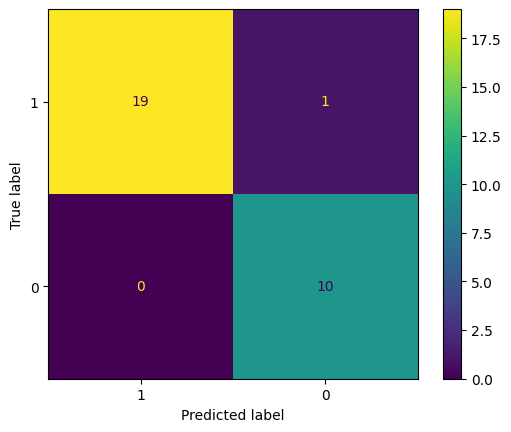

In [ ]:
y_pred_moons = model_moons.predict(X_test_moons)
cm_moons = confusion_matrix(y_test_moons, y_pred_moons)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_moons, display_labels=[1,0])
disp.plot(cmap='viridis')

In [ ]:
print(classification_report(y_test_moons, y_pred_moons))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Vecteurs supports
On peut afficher les vecteurs supports

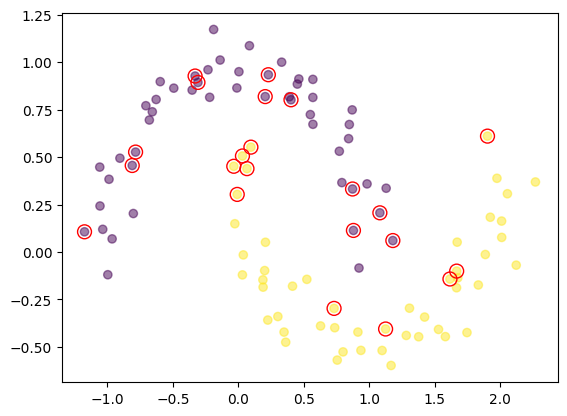

In [ ]:
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons, alpha=0.5)
plt.scatter(model_moons.support_vectors_[:,0], model_moons.support_vectors_[:,1],
            s=100, facecolors='none', edgecolors='red')
plt.show()

## Classification avec les données d'IRIS

In [ ]:
iris = load_iris()

In [ ]:
print(f"data shape: {iris.data.shape}")
print(f"target shape: {iris.target.shape}")

data shape: (150, 4)
target shape: (150,)


C'est un dataset de classification multiclasse(3 classes et 4 features) qui contient 150 échantillons (donc 50 par espèce).
Pour chaque fleur, quatre mesures physiques ont été prises :

  - Sepal Length : Longueur du sépale.
  - Sepal Width : Largeur du sépale.
  - Petal Length : Longueur du pétale.
  - Petal Width : Largeur du pétale.

Le but est de prédire l'espèce de l'iris parmi les trois suivantes :

  - Iris Setosa : La plus facile à distinguer (ses pétales sont très petits).
  - Iris Versicolor : Caractéristiques intermédiaires.
  - Iris Virginica : Souvent confondue avec la Versicolor, mais généralement plus grande.

In [101]:
x = iris.data[ : , [0,1]]
x_iris_train , x_iris_test, y_iris_train , y_iris_test = train_test_split( x, iris.target , test_size = 0.2 , random_state= 42)

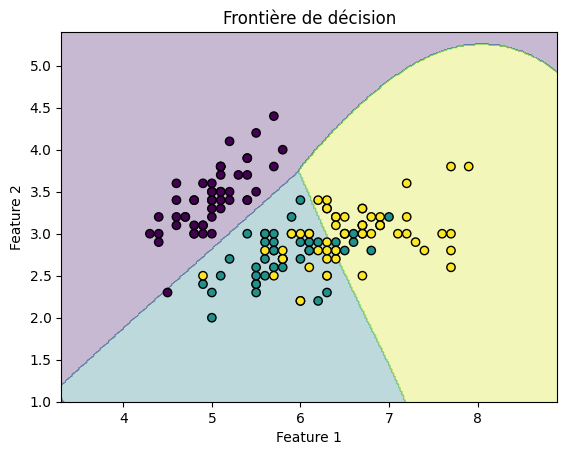

In [102]:
from sklearn.svm import SVC
model_iris = SVC(kernel='rbf', C=1.5)
model_iris.fit(x_iris_train ,y_iris_train)
plot_decision_boundary(model_iris , iris.data , iris.target)

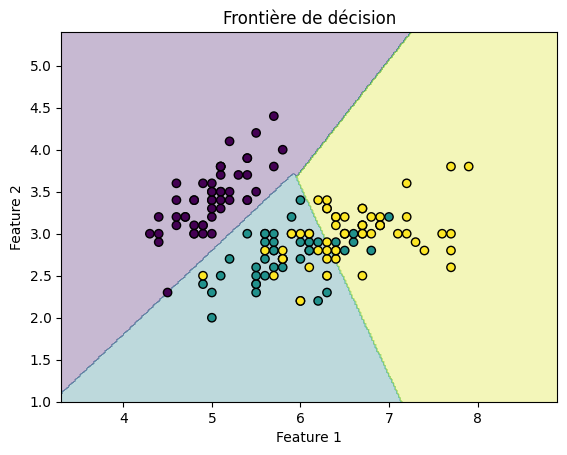

In [103]:
from sklearn.svm import SVC
model_iris = SVC(kernel='linear' , C=1.5)
model_iris.fit(x_iris_train ,y_iris_train)
plot_decision_boundary(model_iris , iris.data , iris.target)

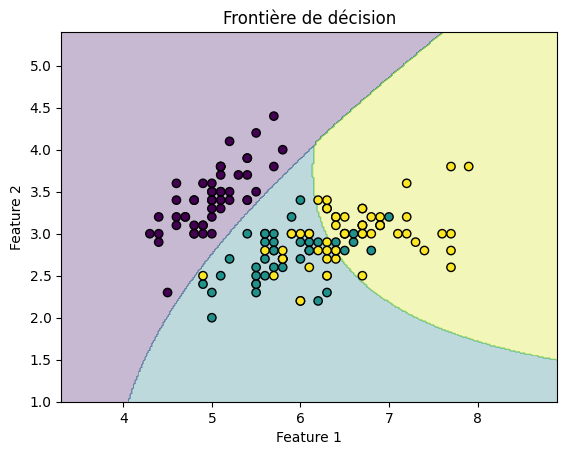

In [104]:
from sklearn.svm import SVC
model_iris = SVC(kernel='poly' , C=1.5)
model_iris.fit(x_iris_train ,y_iris_train)
plot_decision_boundary(model_iris , iris.data , iris.target)

Vous devez faire la classification svm sur les données du dataset iris.

Trouver les meilleurs hyperparametres

## Classification de visage Humains

Cette partie du TD se base sur ce tutoriel sur le site de scikit-learn : https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html.

Voici une description des données que nous allons utiliser : Le dataset LFW (Labeled Faces in the Wild) est une collection de portraits de visages de personnalités conçue pour tester les algorithmes de reconnaissance faciale dans des conditions non contrôlées (variations de pose, d'éclairage et d'expression).

Lorsqu'on l'utilise avec Scikit-Learn via fetch_lfw_people, les images sont converties en niveaux de gris et "aplaties" en vecteurs de pixels pour être traitées comme des données numériques classiques.

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X_lfw = lfw_people.data
n_features = X_lfw.shape[1]

# the label to predict is the id of the person
y_lfw = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
X_train_lfw, X_test_lfw, y_train_lfw, y_test_lfw = train_test_split(
    X_lfw, y_lfw, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train_iris = scaler.fit_transform(X_train_lfw)
X_test_iris = scaler.transform(X_test_lfw)

Utiliser l'acp pour faire la reduction de dimenstion des données pour ne garder que les premiers 150 eigenfaces.

Entrainer un classifier SVM sur les données reduites

Faites la prédiction le nom des personnes sur l'ensemble de test

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [ ]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred_iris, y_test_iris, target_names, i) for i in range(y_pred_iris.shape[0])
]

plot_gallery(X_test_iris, prediction_titles, h, w)

NameError: name 'y_pred_iris' is not defined

In [ ]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

## Régression avec SVR

In [ ]:
from sklearn.datasets import make_regression
Xr, yr = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)
plt.scatter(Xr, yr)
plt.show()

In [ ]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.3)
svr = SVR(kernel='rbf', C=10, epsilon=1)
svr.fit(Xr_train, yr_train)
yr_pred = svr.predict(Xr_test)
print("MSE:", mean_squared_error(yr_test, yr_pred))

### Visualisation SVR

In [ ]:
idx = np.argsort(Xr_test[:,0])
plt.scatter(Xr_test, yr_test, label="Vrai")
plt.plot(Xr_test[idx], yr_pred[idx], color='red', label="Prédit")
plt.legend()
plt.show()